In [1]:
#Importing pandas and appriori and association rule libraries
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import scipy.stats as stats
import numpy as np

# Data Collection and Preparation

In [2]:
# Reading the entire workbook
data = pd.ExcelFile("Global Superstore lite.xlsx")

In [3]:
# Reading each sheet into a DataFrame
orders_df = data.parse('Orders')
returns_df = data.parse('Returns')
people_df = data.parse('People')

In [4]:
#Data types for each category
print (orders_df.dtypes)

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Postal Code              float64
Market                    object
Region                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object


In [5]:
#Count of Non-Null values and data type
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          999 non-null    int64         
 1   Order ID        999 non-null    object        
 2   Order Date      999 non-null    datetime64[ns]
 3   Ship Date       999 non-null    datetime64[ns]
 4   Ship Mode       999 non-null    object        
 5   Customer ID     999 non-null    object        
 6   Customer Name   999 non-null    object        
 7   Segment         999 non-null    object        
 8   City            999 non-null    object        
 9   State           999 non-null    object        
 10  Country         999 non-null    object        
 11  Postal Code     196 non-null    float64       
 12  Market          999 non-null    object        
 13  Region          999 non-null    object        
 14  Product ID      999 non-null    object        
 15  Catego

In [6]:
#Finding the sum of missing values
missing_values=orders_df.isnull().sum()
missing_values

Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Postal Code       803
Market              0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
dtype: int64

In [7]:
#percentage list of missing data
missing_pt = round(missing_values/len(orders_df)*100,1)
missing_pt

Row ID             0.0
Order ID           0.0
Order Date         0.0
Ship Date          0.0
Ship Mode          0.0
Customer ID        0.0
Customer Name      0.0
Segment            0.0
City               0.0
State              0.0
Country            0.0
Postal Code       80.4
Market             0.0
Region             0.0
Product ID         0.0
Category           0.0
Sub-Category       0.0
Product Name       0.0
Sales              0.0
Quantity           0.0
Discount           0.0
Profit             0.0
Shipping Cost      0.0
Order Priority     0.0
dtype: float64

In [8]:
#Removing the missing values column
orders_df.drop(columns='Postal Code',inplace=True)

In [9]:
#Finding duplicates
superstore_duplicates=orders_df[orders_df.duplicated()]
superstore_duplicates

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [10]:
#Summary of the dataset
summary=orders_df.describe()
summary

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost
count,999.000000,999,999,999.000000,999.000000,999.000000,999.000000,999.000000
mean,25057.866867,2013-05-19 18:12:36.756756992,2013-05-22 15:03:47.027026944,2162.657920,6.039039,0.088729,370.525988,337.569577
min,58.000000,2011-01-07 00:00:00,2011-01-11 00:00:00,457.140000,1.000000,0.000000,-6599.978000,203.132000
25%,15105.500000,2012-06-19 12:00:00,2012-06-22 00:00:00,1273.342500,4.000000,0.000000,90.405000,236.375000
50%,25116.000000,2013-06-28 00:00:00,2013-07-01 00:00:00,1885.320000,6.000000,0.000000,302.373000,290.690000
75%,34149.000000,2014-05-29 00:00:00,2014-06-02 12:00:00,2694.810000,8.000000,0.150000,653.010000,384.045000
max,51284.000000,2014-12-31 00:00:00,2015-01-03 00:00:00,17499.950000,14.000000,0.800000,8399.976000,933.570000
std,12884.796343,NaN,NaN,1345.159144,2.627410,0.139117,769.039276,140.103706


In [11]:
#Saving the Updated Excel file
file_path = "GlobalSuperStore1.xlsx"
orders_df.to_excel(file_path, index=False)

In [12]:
# Saving all sheets to a single Excel file
file_path = "GlobalSuperStore_Cleaned.xlsx"
with pd.ExcelWriter(file_path) as writer:
    orders_df.to_excel(writer, sheet_name='Orders', index=False)
    returns_df.to_excel(writer, sheet_name='Returns', index=False)
    people_df.to_excel(writer, sheet_name='People', index=False)


# Market Basket Analysis - Candidate Generation in Apriori Algorithm

In [13]:
# Convert 'Sub-Category' column into dummies i.e. Each unique value in the sub-category variable is converted into a column. 
transaction_df = pd.get_dummies(orders_df['Sub-Category'])
transaction_df 

,Accessories,Appliances,Binders,Bookcases,Chairs,Copiers,Furnishings,Machines,Phones,Storage,Supplies,Tables
0,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,True,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,True
996,False,True,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,True,False,False,False,False,False,False


In [14]:
# Concatenate 'Order ID' column to transaction_df
transaction_df = pd.concat([orders_df['Order ID'], transaction_df], axis=1)
transaction_df 

,Order ID,Accessories,Appliances,Binders,Bookcases,Chairs,Copiers,Furnishings,Machines,Phones,Storage,Supplies,Tables
0,CA-2012-124891,True,False,False,False,False,False,False,False,False,False,False,False
1,IN-2013-77878,False,False,False,False,True,False,False,False,False,False,False,False
2,IN-2013-71249,False,False,False,False,False,False,False,False,True,False,False,False
3,ES-2013-1579342,False,False,False,False,False,False,False,False,True,False,False,False
4,SG-2013-4320,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,SY-2012-8920,False,False,False,False,False,False,False,False,True,False,False,False
995,IN-2014-48625,False,False,False,False,False,False,False,False,False,False,False,True
996,US-2013-113649,False,True,False,False,False,False,False,False,False,False,False,False
997,IN-2013-85662,False,False,False,False,False,True,False,False,False,False,False,False


In [15]:
# Group by 'Order ID' and sum the occurrence of each sub-category for each order 
transaction_df = transaction_df.groupby('Order ID').sum()
transaction_df

,Accessories,Appliances,Binders,Bookcases,Chairs,Copiers,Furnishings,Machines,Phones,Storage,Supplies,Tables
Order ID,,,,,,,,,,,,
AG-2011-8180,0,0,0,0,0,0,0,1,0,0,0,0
AJ-2013-2640,0,0,0,0,0,0,0,0,0,0,0,1
AL-2011-7440,0,0,0,0,0,0,0,1,0,0,0,0
AL-2013-3830,0,0,0,0,0,0,0,0,1,0,0,0
AO-2011-1670,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
US-2014-167402,0,0,0,0,0,0,0,0,0,0,1,0
US-2014-168046,0,0,0,0,0,0,0,0,0,0,0,1
US-2014-168116,0,0,0,0,0,0,0,1,0,0,0,0


In [1]:
# Replace occurrence greater than 1 with 1  - presence = 1 & absence = 0
transaction_df = transaction_df.applymap(lambda x: 1 if x > 0 else 0)
transaction_df 

NameError: name 'transaction_df' is not defined

# Step 2: Pruning in Apriori Algorithm

In [18]:
# Market Basket Analysis - Utilizing the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.001, use_colnames=True)
frequent_itemsets


C:\Users\sethm\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.034591,(Accessories)
1,0.139413,(Appliances)
2,0.023061,(Binders)
3,0.140461,(Bookcases)
4,0.119497,(Chairs)
5,0.156184,(Copiers)
6,0.001048,(Furnishings)
7,0.077568,(Machines)
8,0.196017,(Phones)
9,0.037736,(Storage)


# Association Rule Generation in Apriori Algorithm

In [19]:
# Generate association rules with a confidence threshold of 5%
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

# Selecting only the desired columns
desired_columns = ['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']
rules = rules[desired_columns]

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(Accessories),(Chairs),0.034591,0.119497,0.002096,0.060606,0.507177
1,(Accessories),(Machines),0.034591,0.077568,0.002096,0.060606,0.781327
2,(Supplies),(Bookcases),0.006289,0.140461,0.001048,0.166667,1.186567
3,(Storage),(Copiers),0.037736,0.156184,0.002096,0.055556,0.355705
4,(Machines),(Phones),0.077568,0.196017,0.004193,0.054054,0.275762
5,"(Bookcases, Tables)",(Chairs),0.001048,0.119497,0.001048,1.000000,8.368421
6,"(Bookcases, Chairs)",(Tables),0.001048,0.106918,0.001048,1.000000,9.352941
7,"(Tables, Chairs)",(Bookcases),0.002096,0.140461,0.001048,0.500000,3.559701


# Error Margin 

In [20]:
# Calculate standard error of confidence
std_error_confidence = stats.sem(rules['confidence'])

# Calculate critical value (e.g., for 95% confidence interval)
critical_value = stats.t.ppf(0.975, len(rules)-1)

# Calculate margin of error
margin_of_error = critical_value * std_error_confidence

# Calculate confidence interval
confidence_interval_lower = rules['confidence'] - margin_of_error
confidence_interval_upper = rules['confidence'] + margin_of_error

# Add confidence interval to the DataFrame
rules['confidence_interval_lower'] = confidence_interval_lower
rules['confidence_interval_upper'] = confidence_interval_upper


# Calculate standard error of confidence for lift
std_error_lift = stats.sem(rules['lift'])

# Calculate critical value (e.g., for 95% confidence interval) for lift
critical_value_lift = stats.t.ppf(0.975, len(rules)-1)

# Calculate margin of error for lift
margin_of_error_lift = critical_value_lift * std_error_lift

# Calculate confidence interval for lift
lift_confidence_interval_lower = rules['lift'] - margin_of_error_lift
lift_confidence_interval_upper = rules['lift'] + margin_of_error_lift



# Calculate standard error of support
std_error_support = stats.sem(rules['support'])

# Calculate critical value (e.g., for 95% confidence interval) for support
critical_value_support = stats.t.ppf(0.975, len(rules)-1)

# Calculate margin of error for support
margin_of_error_support = critical_value_support * std_error_support

# Calculate confidence interval for support
support_confidence_interval_lower = rules['support'] - margin_of_error_support
support_confidence_interval_upper = rules['support'] + margin_of_error_support



# Create a new DataFrame for storing confidence intervals
confidence_intervals_df = pd.DataFrame({
    'confidence_interval_lower': confidence_interval_lower,
    'confidence_interval_upper': confidence_interval_upper,
    'lift_confidence_interval_lower': lift_confidence_interval_lower,
    'lift_confidence_interval_upper': lift_confidence_interval_upper,
    'support_confidence_interval_lower': support_confidence_interval_lower,
    'support_confidence_interval_upper': support_confidence_interval_upper
})

confidence_intervals_df

,confidence_interval_lower,confidence_interval_upper,lift_confidence_interval_lower,lift_confidence_interval_upper,support_confidence_interval_lower,support_confidence_interval_upper
0,-0.291503,0.412715,-2.625923,3.640277,0.001189,0.003004
1,-0.291503,0.412715,-2.351773,3.914426,0.001189,0.003004
2,-0.185442,0.518775,-1.946533,4.319667,0.000141,0.001955
3,-0.296553,0.407664,-2.777395,3.488804,0.001189,0.003004
4,-0.298055,0.406163,-2.857337,3.408862,0.003286,0.005100
5,0.647891,1.352109,5.235321,11.501521,0.000141,0.001955
6,0.647891,1.352109,6.219842,12.486041,0.000141,0.001955
7,0.147891,0.852109,0.426602,6.692801,0.000141,0.001955


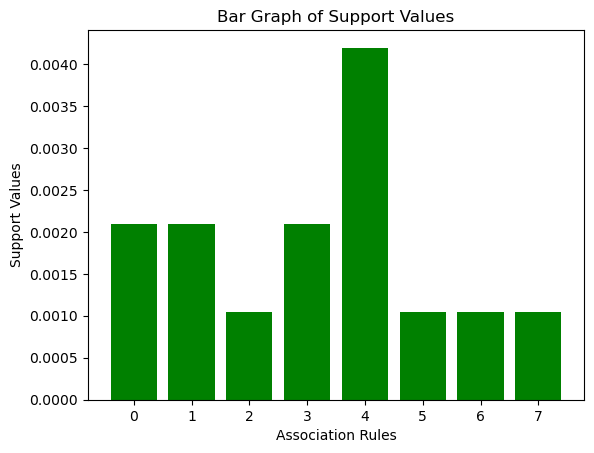

In [28]:
# Bar Graph of Support Values

# Plotting support
support = rules['support']
plt.bar(range(len(support)), support, color='green')

# Adding labels and title
plt.xlabel('Association Rules')
plt.ylabel('Support Values')
plt.title('Bar Graph of Support Values')

# Displaying the plot
plt.show()

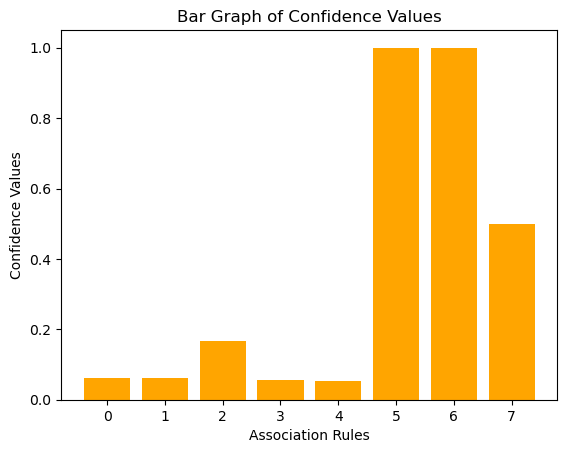

In [27]:
#Bar Graph of Confidence Values

confidence = rules['confidence']
plt.bar(range(len(confidence)), confidence, color='orange')

# Adding labels and title
plt.xlabel('Association Rules')
plt.ylabel('Confidence Values')
plt.title('Bar Graph of Confidence Values')

# Displaying the plot
plt.show()

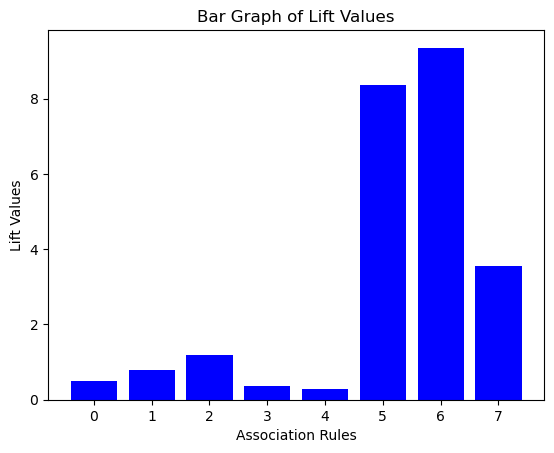

In [26]:
# Bar Graph of Lift Values

lift = rules['lift']
plt.bar(range(len(lift)), lift, color='blue')

# Adding labels and title
plt.xlabel('Association Rules')
plt.ylabel('Lift Values')
plt.title('Bar Graph of Lift Values')

# Displaying the plot
plt.show()
